<a href="https://colab.research.google.com/github/jimmy-io/worksheeets-/blob/master/python_stats_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:

# Draw 10000 samples from a normal distribution of Twitter followers
twitter_mu = 208.0
twitter_sigma = 60.0
twitter_followers = np.random.normal(twitter_mu, twitter_sigma, 10000)

# show first 12 samples
twitter_followers[:12]

array([172.51606499, 189.26498992, 229.26325311, 169.93000625,
       136.03514914, 194.36804803, 143.5832439 , 134.35445888,
        93.2857916 , 210.99366   , 283.43286218, 222.80063978])

In [3]:

# Draw 10000 samples from a normal distribution of Facebook friends
facebook_mu = 190.0
facebook_sigma = 36.0
facebook_friends = np.random.normal(facebook_mu, facebook_sigma, 10000)

# show first 12 samples
facebook_friends[:12]

array([196.15941476, 186.88521232, 271.83322332, 213.59895174,
       230.14630912, 183.37809986, 192.95508368, 188.65007796,
       210.7849445 , 116.46683152, 186.17264338, 148.24566234])

No handles with labels found to put in legend.


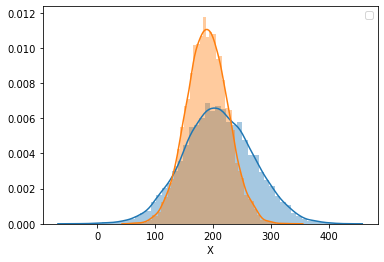

In [11]:
sns.distplot(twitter_followers)
sns.distplot(facebook_friends)
plt.xlabel('X')
c=plt.legend()


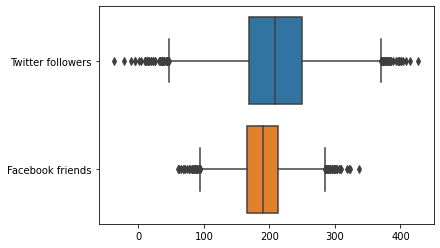

In [18]:
c=sns.boxplot([twitter_followers, facebook_friends], 
            ['Twitter followers', 'Facebook friends'])


## The Standard Normal Distribution

In [0]:
z_scores_t = stats.mstats.zscore(twitter_followers)
z_scores_f = stats.mstats.zscore(facebook_friends)

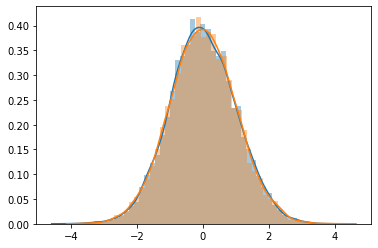

In [21]:
sns.distplot(z_scores_t)
sns.distplot(z_scores_f)

## Using the Probability Density Function

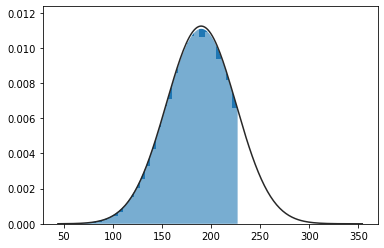

In [24]:
## # First take a look at the pdf and especially the green area under
# the curve containing the probability of 227 Facebook friends or less.
x = 227.0
sns.distplot(facebook_friends, label='Facebook friends', kde=False, 
             fit=stats.norm, color='w')
x_plot = np.linspace(min(facebook_friends), x, 1000)
y_plot = stats.norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.fill_between(x_plot,  y_plot)

In [25]:

# To calculate the probability, we need the z score.
zscore = (x - facebook_mu) / facebook_sigma
zscore

1.0277777777777777

In [26]:
# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p = stats.norm.cdf(zscore)
p

0.8479728141176333

## From probability back to the actual value

In [27]:
## Let's assume we have a 21% chance of having a certain number of Facebook 
##friends or more. What is the minimum number of Facebook friends we have in this case?

# We use the ppf function (inverse cdf) - from probability to z score
p = 1 - .21
z = stats.norm.ppf(p)
z

0.8064212470182404

In [28]:
# From z score to number of Facebook friends
x = z * facebook_sigma + facebook_mu
x

219.03116489265665

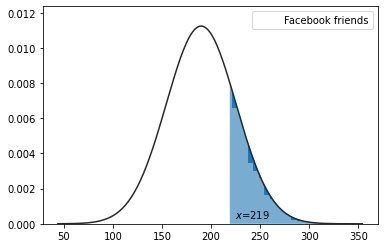

In [29]:
# The green area under the curve containing the probability 
# of (roughly) 206 Facebook friends or more.
sns.distplot(facebook_friends, label='Facebook friends', kde=False, 
             fit=stats.norm, color='w')
plt.text(x+5, .0003, '$x$='+str(int(x)))

x_plot = np.linspace(x, max(facebook_friends), 1000)
y_plot = stats.norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.fill_between(x_plot,  y_plot)
c=plt.legend()

In [30]:
data = np.array([1.0, 2.0, 3.0, 4.0])
data

array([1., 2., 3., 4.])

In [0]:
data = pd.Series(data)

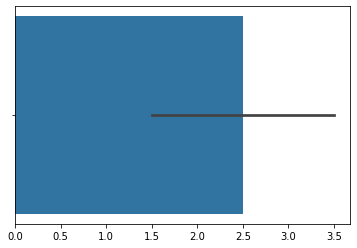

In [40]:
sns.barplot(data)

In [42]:
data.mean()

2.5

In [43]:
data.std(ddof = 0)

1.118033988749895

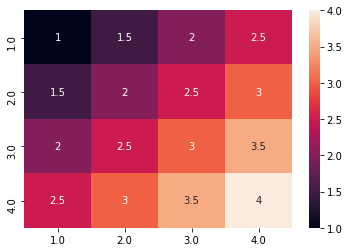

In [44]:
mean_outcome_matrix = pd.DataFrame(index=data, dtype='float64', columns=data )

for x in data:
    for y in data:
        mean_outcome_matrix[x][y] = np.mean([x,y])

# Below you see a heatmap of the mean of all possible outcomes
p=sns.heatmap(mean_outcome_matrix, annot=True)

In [46]:
mean_outcome_matrix.mean().mean()

2.5

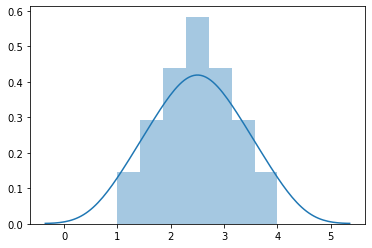

In [50]:
p=sns.distplot(mean_outcome_matrix, bins = 7)

In [51]:
data = pd.read_csv('/content/drive/My Drive/Insight/klout-scores.csv', header=None, names=['scores'])
data.head()

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


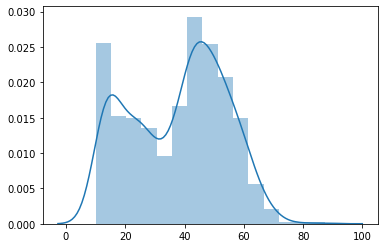

In [52]:
sns.distplot(data)

## Confidence Interval

In [54]:
klout_xbar = data['scores'].mean()
klout_xbar

37.719054832538156

In [56]:
klout_s = data['scores'].std(ddof = 1)
klout_s

16.04431497904899

In [59]:
a = 0.05
z_score = stats.norm.ppf(a/2)*-1
z_score

1.9599639845400545

In [60]:
zscore_interval = stats.norm.interval(alpha=0.95)
zscore_interval

(-1.959963984540054, 1.959963984540054)

In [62]:
klout_SE = klout_s/len(data)**0.5
klout_SE

0.49561054484656264

In [63]:
klout_CI_mean_lower = klout_xbar - z_score * klout_SE
klout_CI_mean_upper = klout_xbar + z_score * klout_SE
klout_CI_mean_lower, klout_CI_mean_upper

(36.74767601428062, 38.69043365079569)

In [66]:
data = pd.read_csv('/content/drive/My Drive/Insight/wildlife.csv')

# We only need the incident dates this time
data = data[['INCIDENT_DATE']]
data.INCIDENT_DATE = pd.to_datetime(data.INCIDENT_DATE)
data = data.groupby('INCIDENT_DATE')['INCIDENT_DATE'].size()
data.head()

INCIDENT_DATE
2012-01-02    1
2012-01-04    2
2012-01-05    5
2012-01-06    3
2012-01-07    2
Name: INCIDENT_DATE, dtype: int64

In [67]:
# Set the index to contain all days in 2012 and 2013
days_2012_2013 = pd.date_range('1/1/2012', '12/31/2013')
data = pd.DataFrame(data, index=days_2012_2013)
data.head()

,INCIDENT_DATE
2012-01-01,NaN
2012-01-02,1.0
2012-01-03,NaN
2012-01-04,2.0
2012-01-05,5.0


In [68]:
# Fill the data with no strike incidents (NaN) with a zero
data = data.fillna(0)
data.head()

,INCIDENT_DATE
2012-01-01,0.0
2012-01-02,1.0
2012-01-03,0.0
2012-01-04,2.0
2012-01-05,5.0


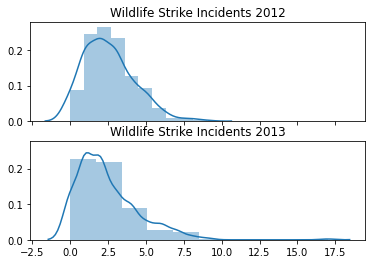

In [72]:
# Plot of the daily strike incident frequencies of 2012 and 2013
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
sns.distplot(data['2012']['INCIDENT_DATE'], ax=ax1, bins = 10)
sns.distplot(data['2013']['INCIDENT_DATE'], ax=ax2, bins = 10)
ax1.set_title('Wildlife Strike Incidents 2012')
ax2.set_title('Wildlife Strike Incidents 2013')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

## Hypothesis testing
Let's asume that the Federal Aviation Administration launched a new Wildlife Strike Prevention Program in 2013. We want to know if there is a significant decline in the number of daily strike incidents in 2013 as opposed to 2012. This forms our operational definition. We choose an alpha level of .05 as our level of significance. A probability smaller than the alpha level leads to rejecting the null hypothesis.

In [74]:

# We assume stats from the wildlife strike incidents in 2012
# to be our population parameters
mu = data['2012']['INCIDENT_DATE'].mean()
sigma = data['2012']['INCIDENT_DATE'].std()
mu, sigma

(2.5546448087431695, 1.6818182461905788)

In [76]:
xbar = data['2013']['INCIDENT_DATE'].mean()
xbar

2.4328767123287673

In [77]:
# What is our sample size
n = data['2013']['INCIDENT_DATE'].count()
n


365

In [79]:
# Calculate the standard error
SE = sigma / n**0.5
SE

0.08803039035048665

In [80]:
# Calculate the z score for the mean of 2013 (xbar)
zscore = (xbar - mu) / SE
zscore

-1.3832506697924571

In [81]:
# Calculate the critical value of the alpha level on one side of the
# distribution, because we're only intrested in a mean decline
alpha = .05
critical_value = stats.norm.ppf(alpha)
critical_value

-1.6448536269514729

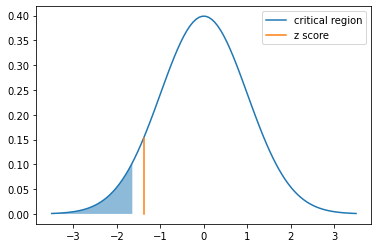

In [85]:
# Plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5, 3.5, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

# Plot the critical region
x_crit = np.linspace(-3.5, critical_value, samples)
y_crit = stats.norm.pdf(x_crit, 0, 1)
plt.fill_between(x_crit,  y_crit, alpha=.5)

# Plot the z score
plt.plot([zscore, zscore], [0, stats.norm.pdf(zscore)])

# Show legend
plt.legend(['critical region', 'z score'])
plt.show()

In [86]:
# So given these values let's test the alternative hypothesis
zscore < critical_value

False

In [87]:

# The probability of drawing this sample mean is about 8%
p = stats.norm.cdf(zscore)
p

0.083294009028341

This means we could have drawn a mean sample xbar from the real population pure by random chance, therefore we fail to reject the null hypothesis. In other words, there is no significant difference of average daily strike incidents between 2013 and 2012.

## Exploring t-test and Cohen's d effect

In [88]:
# data = np.random.random_sample(25) * 360000 + 100000 / floor it
housing_prices = pd.Series(
    [319711.,  289066.,  212512.,  195347.,  245589.,  418577., 
     301112.,  327251.,  434408.,  224529.,  450276.,  423406.,
     230321.,  275374.,  215945.,  209971.,  322661.,  292517.,
     378317.,  194028.,  347261.,  104542.,  231457.,  335174.,  
     369656.])
housing_prices.head()

0    319711.0
1    289066.0
2    212512.0
3    195347.0
4    245589.0
dtype: float64

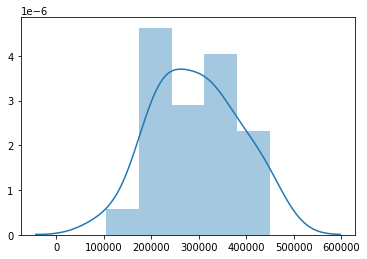

In [89]:
sns.distplot(housing_prices)

##Hypothesis
We want to know if there is a significant difference in the mean housing price, compared to the average price of a house in our country. The latter has a mean of $\mu=289.100$. We choose as our test criterium an alpha level of 5%. So our hypothesis states:

In [90]:
# The mean housing price is a given
mu = 289100.
mu

289100.0

In [91]:
# The sample statistics
n = housing_prices.count()
xbar = housing_prices.mean()
s = housing_prices.std(ddof=1)
n, xbar, s


(25, 293960.32, 88348.43221383916)

In [92]:
# Show the mean difference
xbar - mu

4860.320000000007

##The t-distribution
Since we don't know the standard deviation of the population, we can't use the the standard normal distribution to perform our hypothesis test. If we don't know this population parameter we us the t-distribution. 


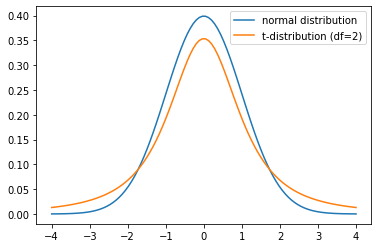

In [93]:
# Plot the normal distribution
samples = 100
dof = 2
x_plot = np.linspace(-4, 4, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

x_plot = np.linspace(-4, 4, samples)
y_plot = stats.t.pdf(x_plot, dof)
plt.plot(x_plot, y_plot)

# Show legend
plt.legend(['normal distribution', 't-distribution (df=2)'])
plt.show()

## The one-sample t-test

In [94]:

# Calculate the t-statistic for the sample mean
se = s / n**0.5
t_statistic = (xbar - mu) / se
t_statistic

0.2750654356964737

In [95]:
# What is the probability of getting this mean?
p = stats.t.sf(t_statistic, dof) * 2. # two-sided test 
p

0.8090771938198835

In [96]:
# To test our alternative hypothesis
alpha = .05
p < alpha / 2 #two sided

False


So we fail to reject the null hypothesis. A mean difference of 4860.32 in housing prices between our neigbourhood and the whole country is not significant.